# Neural Networks

## XNOR

In [15]:
import numpy as np
from src.si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [16]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [17]:
from src.si.supervised.NN import Dense, activation,NN
from src.si.util import Sigmoid, cross_entropy, cross_entropy_prime

In [18]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [19]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [20]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(activation(Sigmoid()))
nn.add(l2)
nn.add(activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True

In [21]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [22]:
nn.cost(dataset.X,dataset.Y)

2.066588540474394e-09

## Train the model using backpropagation

In [23]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [24]:
nn2.fit(dataset)

error = 0.0007830646415768238


In [25]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

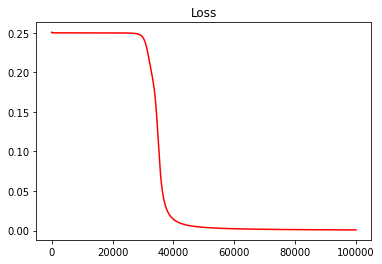

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [27]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [28]:
nn2.cost(dataset.X,dataset.Y)

0.0007830516012439476